#  Loan Approval Prediction using Classification Algorithms

In this project,we are given a dataset of Loan Applicants who have applied for a loan in the bank. Using Classification Algorithms,we are supposed to predict whether the applicant's loan should be sanctioned or not on the basis of given features.

# Importing the Libraries

Importing all the necessary libraries and methods required to build the model.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# Importing dataset

Importing training and testing dataset(in csv format).

In [2]:
dftrain=pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
dftest=pd.read_csv('test_Y3wMUE5_7gLdaTN.csv')

In [3]:
dftrain.shape,dftest.shape

((614, 13), (367, 12))

In [4]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
dftrain.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Data Visualization

Using seaborn library,columns are visualized through various plots.

<Axes: xlabel='Gender', ylabel='count'>

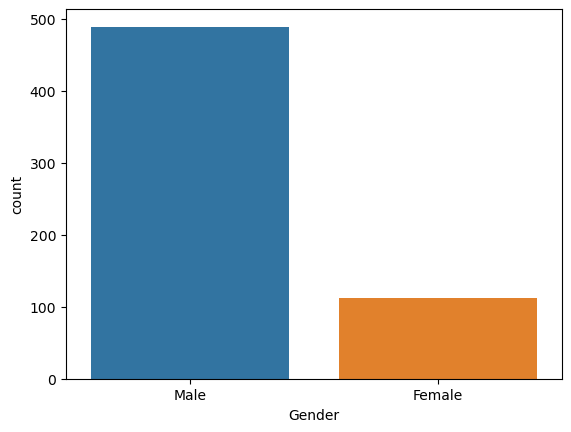

In [6]:
sns.countplot(x=dftrain['Gender'])

<Axes: xlabel='Married', ylabel='count'>

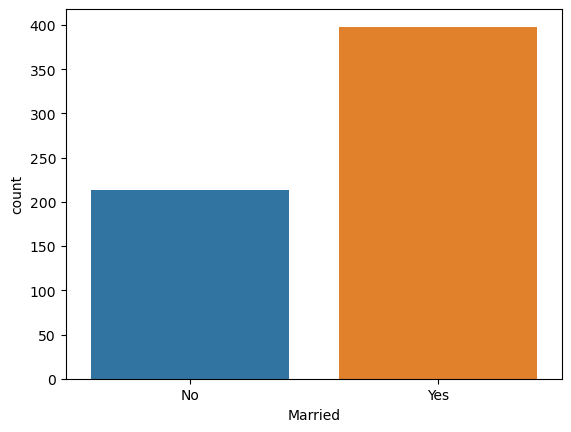

In [7]:
sns.countplot(x=dftrain['Married'])

<Axes: xlabel='count', ylabel='Dependents'>

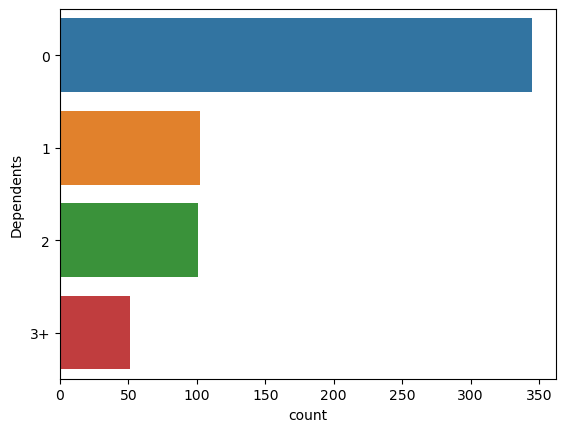

In [8]:
sns.countplot(y=dftrain['Dependents'])

<Axes: xlabel='Self_Employed', ylabel='count'>

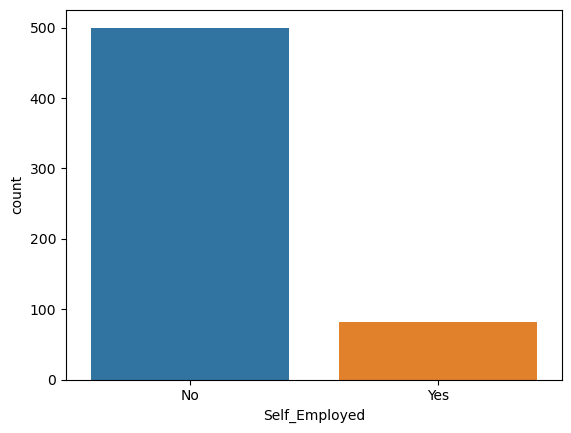

In [9]:
sns.countplot(x=dftrain['Self_Employed'])

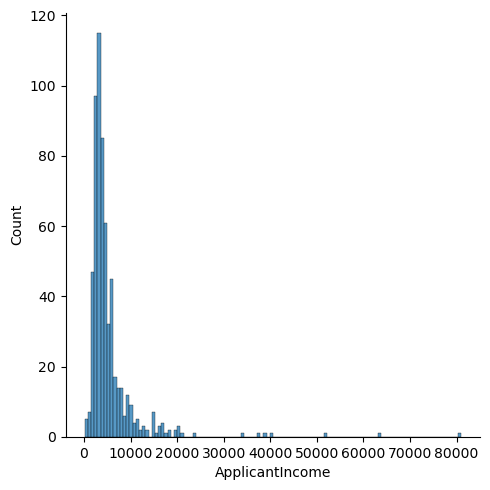

In [10]:
sns.displot(dftrain['ApplicantIncome'],kde=False)
plt.show()

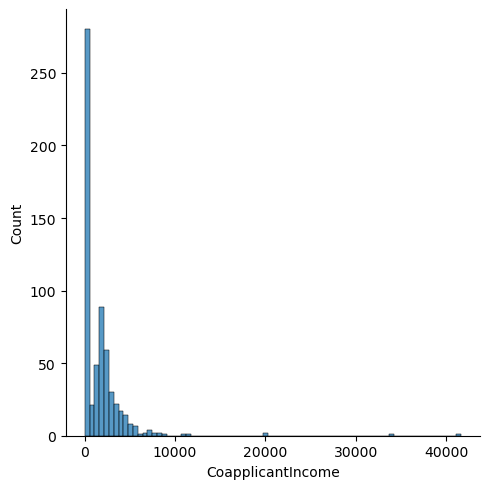

In [11]:
sns.displot(dftrain['CoapplicantIncome'],kde=False)

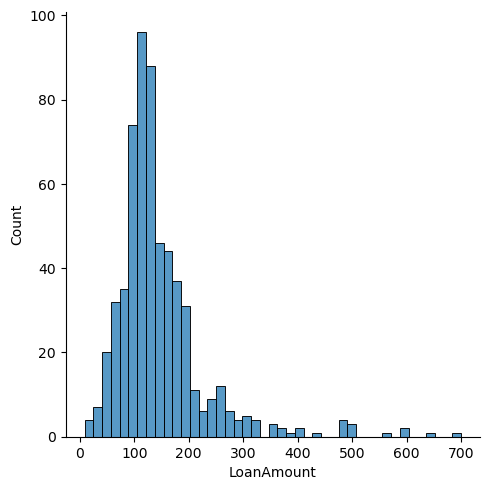

In [12]:
sns.displot(dftrain['LoanAmount'],kde=False)

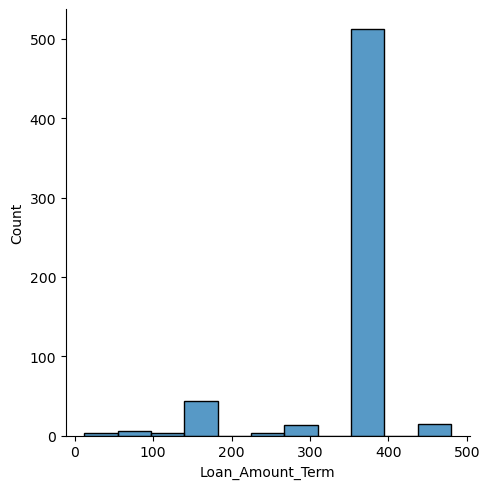

In [13]:
sns.displot(dftrain['Loan_Amount_Term'],kde=False)

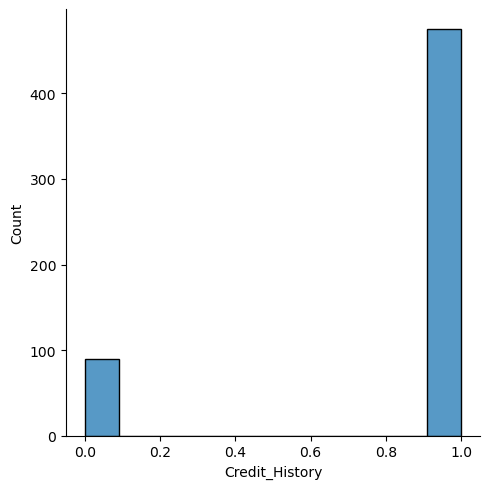

In [14]:
sns.displot(dftrain['Credit_History'],kde=False)

# Data Preprocessing

1. Filling missing values

In [15]:
dftrain['LoanAmount'].fillna(dftrain['LoanAmount'].median(),inplace=True)
dftrain['Loan_Amount_Term'].fillna(dftrain['Loan_Amount_Term'].median(),inplace=True)
dftrain['ApplicantIncome'].fillna(dftrain['ApplicantIncome'].mean(),inplace=True)
dftrain['CoapplicantIncome'].fillna(dftrain['CoapplicantIncome'].mean(),inplace=True)
dftrain['Gender'].fillna(value='Male',inplace=True)
dftrain['Credit_History'].fillna(dftrain['Credit_History'].mean(),inplace=True)

dftrain['Married'].fillna(value='Yes',inplace=True)
dftrain['Dependents'].fillna(value=0,inplace=True)
dftrain['Self_Employed'].fillna(value='No',inplace=True)

2.Dropping unnecessary columns

In [16]:
dftrain.drop(labels='Loan_ID',axis=1,inplace=True)

3.Encoding Categorical variables 

In [17]:
dftrain['Gender']=dftrain['Gender'].replace({'Male':1,'Female':0})
dftrain['Married']=dftrain['Married'].replace({'Yes':1,'No':0})
dftrain['Education']=dftrain['Education'].replace({'Graduate':1,'Not Graduate':0})
dftrain['Self_Employed']=dftrain['Self_Employed'].replace({'No':1,'Yes':0})
dftrain['Property_Area']=dftrain['Property_Area'].replace({'Semiurban':1,'Urban':2,'Rural':3})
dftrain['Loan_Status']=dftrain['Loan_Status'].replace({'Y':1,'N':0})
dftrain['Dependents']=dftrain['Dependents'].replace({'3+':3})

In [18]:
dftrain['Gender']=pd.to_numeric(dftrain['Gender'])
dftrain['Married']=pd.to_numeric(dftrain['Married'])
dftrain['Education']=pd.to_numeric(dftrain['Education'])
dftrain['Self_Employed']=pd.to_numeric(dftrain['Self_Employed'])
dftrain['Property_Area']=pd.to_numeric(dftrain['Property_Area'])
dftrain['Loan_Status']=pd.to_numeric(dftrain['Loan_Status'])
dftrain['Dependents']=pd.to_numeric(dftrain['Dependents'])

# Correlation matrix


The correlation of a particular feature with respect to the target variable(Loan_Status) can be useful for feature selection.

<Axes: >

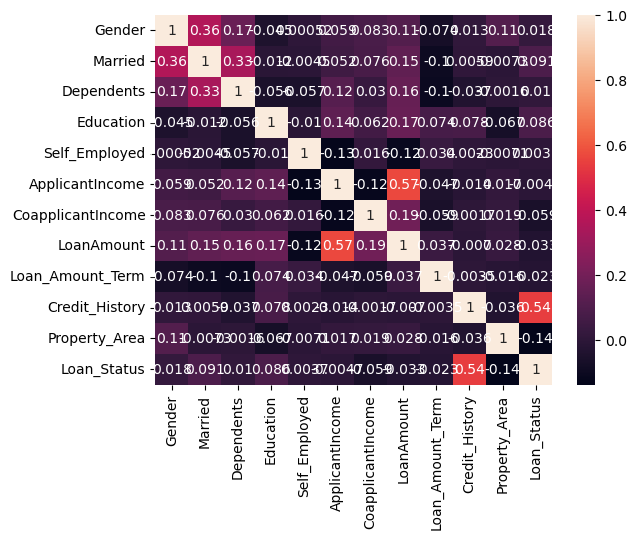

In [19]:
corrmat=dftrain.corr()
sns.heatmap(corrmat,annot=True)

# Defining variables

The target and independent variables are defined and split for training and testing.

In [20]:
ytrain=dftrain['Loan_Status']
Xtrain=dftrain.drop('Loan_Status',axis=1)
X_train, X_test, y_train, y_test = train_test_split(Xtrain, ytrain, test_size = 0.3, random_state = 0)

# Defining ML model

Here,4 models have been defined and data has been fit into them for predicting whether loan should be provided or not.

# 1.Logistic Regression

In [21]:
modellr=LogisticRegression()
modellr.fit(X_train,y_train)

y_predict=modellr.predict(X_test)

LRscore=accuracy_score(y_predict,y_test)
print(classification_report(y_test,y_predict))
print("Accuracy:",LRscore)

              precision    recall  f1-score   support

           0       0.75      0.47      0.58        51
           1       0.82      0.94      0.88       134

    accuracy                           0.81       185
   macro avg       0.79      0.71      0.73       185
weighted avg       0.80      0.81      0.80       185

Accuracy: 0.8108108108108109


c:\Users\dvsam\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
ResultLR=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
ResultLR.to_csv("ResultLR.csv")

# 2.Decision Tree 

In [23]:
modeldt=DecisionTreeClassifier()
modeldt.fit(X_train,y_train)
y_predict=modeldt.predict(X_test)

DTscore=accuracy_score(y_predict,y_test)
print(classification_report(y_test,y_predict))
print("Accuracy:",DTscore)

              precision    recall  f1-score   support

           0       0.61      0.55      0.58        51
           1       0.83      0.87      0.85       134

    accuracy                           0.78       185
   macro avg       0.72      0.71      0.71       185
weighted avg       0.77      0.78      0.77       185

Accuracy: 0.7783783783783784


In [24]:
ResultDT=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
ResultDT.to_csv("ResultDT.csv")

# 3. Random Forest

In [25]:
modelrf=RandomForestClassifier()
modelrf.fit(X_train,y_train)

y_predict=modelrf.predict(X_test)

RFscore=accuracy_score(y_predict,y_test)
print(classification_report(y_test,y_predict))
print("Accuracy:",RFscore)

              precision    recall  f1-score   support

           0       0.70      0.45      0.55        51
           1       0.82      0.93      0.87       134

    accuracy                           0.79       185
   macro avg       0.76      0.69      0.71       185
weighted avg       0.78      0.79      0.78       185

Accuracy: 0.7945945945945946


In [26]:
ResultRF=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
ResultRF.to_csv("ResultRF.csv")

# 4. XGBoost

In [27]:
modelxgb=XGBClassifier()
modelxgb.fit(X_train,y_train)

y_predict=modelxgb.predict(X_test)

XGBscore=accuracy_score(y_predict,y_test)
print(classification_report(y_test,y_predict))
print("Accuracy:",XGBscore)

              precision    recall  f1-score   support

           0       0.67      0.51      0.58        51
           1       0.83      0.90      0.86       134

    accuracy                           0.79       185
   macro avg       0.75      0.71      0.72       185
weighted avg       0.78      0.79      0.79       185

Accuracy: 0.7945945945945946


In [28]:
ResultXGB=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
ResultXGB.to_csv("ResultXGB.csv")

# Comparison of scores

The accuracy obtained on various algorithms are compared and ranked for their performace.

In [29]:
score = [DTscore,RFscore,XGBscore,LRscore]
Models = pd.DataFrame({
    'Algorithm': ["Decision Tree","Random Forest","XG Boost", "Logistic Regression"],
    'Score': score})
Models.sort_values(by='Score', ascending=True)

,Algorithm,Score
0,Decision Tree,0.778378
1,Random Forest,0.794595
2,XG Boost,0.794595
3,Logistic Regression,0.810811
